## ML Lab Internal Exam - SET 1
## Name:BOORLA RAJU
## ID:B200276
## Class: C3

## Dataset Description
The classification task of this database is to determine where patients in a postoperative recovery area (after a operation) should be sent to next. Because hypothermia is a significant concern after surgery (Woolery, L. et. al. 1991), the attributes correspond roughly to body temperature measurements. 


<b>Attribute Information:</b><br>

1. L-CORE (patient's internal temperature in C): <br>
high (> 37), mid (>= 36 and <= 37), low (< 36) <br>
2. L-SURF (patient's surface temperature in C): <br>
high (> 36.5), mid (>= 36.5 and <= 35), low (< 35) <br>
3. L-O2 (oxygen saturation in %): <br>
excellent (>= 98), good (>= 90 and < 98), fair (>= 80 and < 90), poor (< 80) <br>
4. L-BP (last measurement of blood pressure): <br>
high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70) <br> 
5. SURF-STBL (stability of patient's surface temperature): <br>
stable, mod-stable, unstable <br>
6. CORE-STBL (stability of patient's core temperature) <br>
stable, mod-stable, unstable <br>
7. BP-STBL (stability of patient's blood pressure) <br>
stable, mod-stable, unstable <br>
8. COMFORT (patient's perceived comfort at discharge, measured as an integer between 0 and 20) <br>
9. decision ADM-DECS (discharge decision): <br>
I  (patient sent to Intensive Care Unit), <br>
S (patient prepared to go home), <br>
A (patient sent to general hospital floor)

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
#Import Dataset - set1_data.csv 

df = pd.read_csv("set1_data.csv")


In [5]:
df                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10.0,A
86,mid,mid,excellent,mid,unstable,stable,stable,15.0,S
87,mid,mid,NaN,mid,unstable,stable,stable,15.0,A
88,mid,mid,excellent,mid,unstable,stable,stable,10.0,A


In [6]:
# Print top 5 and random 5 values - 2 Marks
df.head()


,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A


In [7]:
# selecting random rows from df
l=[]
l.append(np.random.randint(1,50,5))
for i in range(5):
    print(pd.DataFrame(df.iloc[i,:]))

                   0
L-CORE           mid
L-SURF           low
L-O2       excellent
L-BP             mid
SURF-STBL     stable
CORE-STBL     stable
BP-STBL       stable
COMFORT         15.0
ADM-DECS           A
                   1
L-CORE           mid
L-SURF          high
L-O2       excellent
L-BP            high
SURF-STBL     stable
CORE-STBL     stable
BP-STBL       stable
COMFORT         10.0
ADM-DECS           S
                    2
L-CORE           high
L-SURF            low
L-O2        excellent
L-BP             high
SURF-STBL      stable
CORE-STBL      stable
BP-STBL    mod-stable
COMFORT          10.0
ADM-DECS            A
                    3
L-CORE            mid
L-SURF            low
L-O2             good
L-BP             high
SURF-STBL      stable
CORE-STBL    unstable
BP-STBL    mod-stable
COMFORT          15.0
ADM-DECS            A
                   4
L-CORE           mid
L-SURF           mid
L-O2       excellent
L-BP            high
SURF-STBL     stable
CORE-STBL     

In [8]:
l

[array([43,  9, 38,  3, 26])]

In [9]:
#Print column names - 1 Marks
list(df.columns)

['L-CORE',
 'L-SURF',
 'L-O2',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'COMFORT',
 'ADM-DECS']

In [10]:
#Check the data type of each column - 1 Marks

df.dtypes


L-CORE        object
L-SURF        object
L-O2          object
L-BP          object
SURF-STBL     object
CORE-STBL     object
BP-STBL       object
COMFORT      float64
ADM-DECS      object
dtype: object

In [11]:
#Print number of rows and columns 1 Mark
df.shape


(90, 9)

In [12]:
#Print summary statistics of all variables - 1 Mark
df.describe()

,COMFORT
count,87.000000
mean,10.942529
std,2.304477
min,5.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,15.000000


In [13]:
#Print the number of missing values in each column - 1 Marks

df.isna().sum()


L-CORE       1
L-SURF       0
L-O2         1
L-BP         0
SURF-STBL    1
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64

In [14]:
#Impute missing values - Replace missing categorical values with mode and numerical values with mean of the column - 3 Mark
#Print the number of missing values in each column after imputation
df["L-CORE"].fillna(df["L-CORE"].mode())
df["L-O2"].fillna(df["L-O2"].mode())
df["SURF-STBL"].fillna(df["SURF-STBL"].mode())
df["ADM-DECS"].fillna(df["ADM-DECS"].mode())

0     A
1     S
2     A
3     A
4     A
     ..
85    A
86    S
87    A
88    A
89    S
Name: ADM-DECS, Length: 90, dtype: object

In [15]:
#Print count of patients in each category - 1 Marks
df["ADM-DECS"].value_counts()

ADM-DECS
A    64
S    24
I     2
Name: count, dtype: int64

<Axes: xlabel='COMFORT', ylabel='Count'>

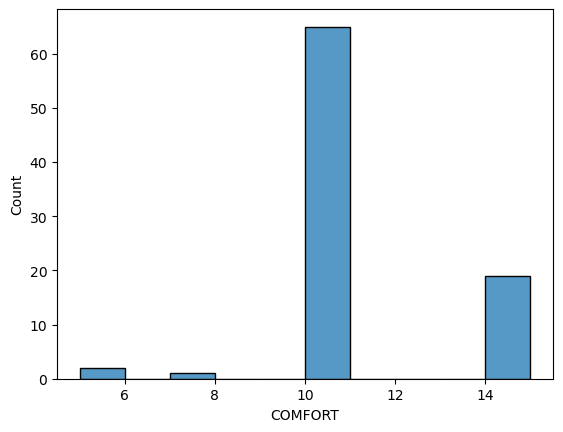

In [16]:
#Plot histogram of values of patient's perceived comfort at discharge - 1 Marks
sns.histplot(df["COMFORT"],bins=10)

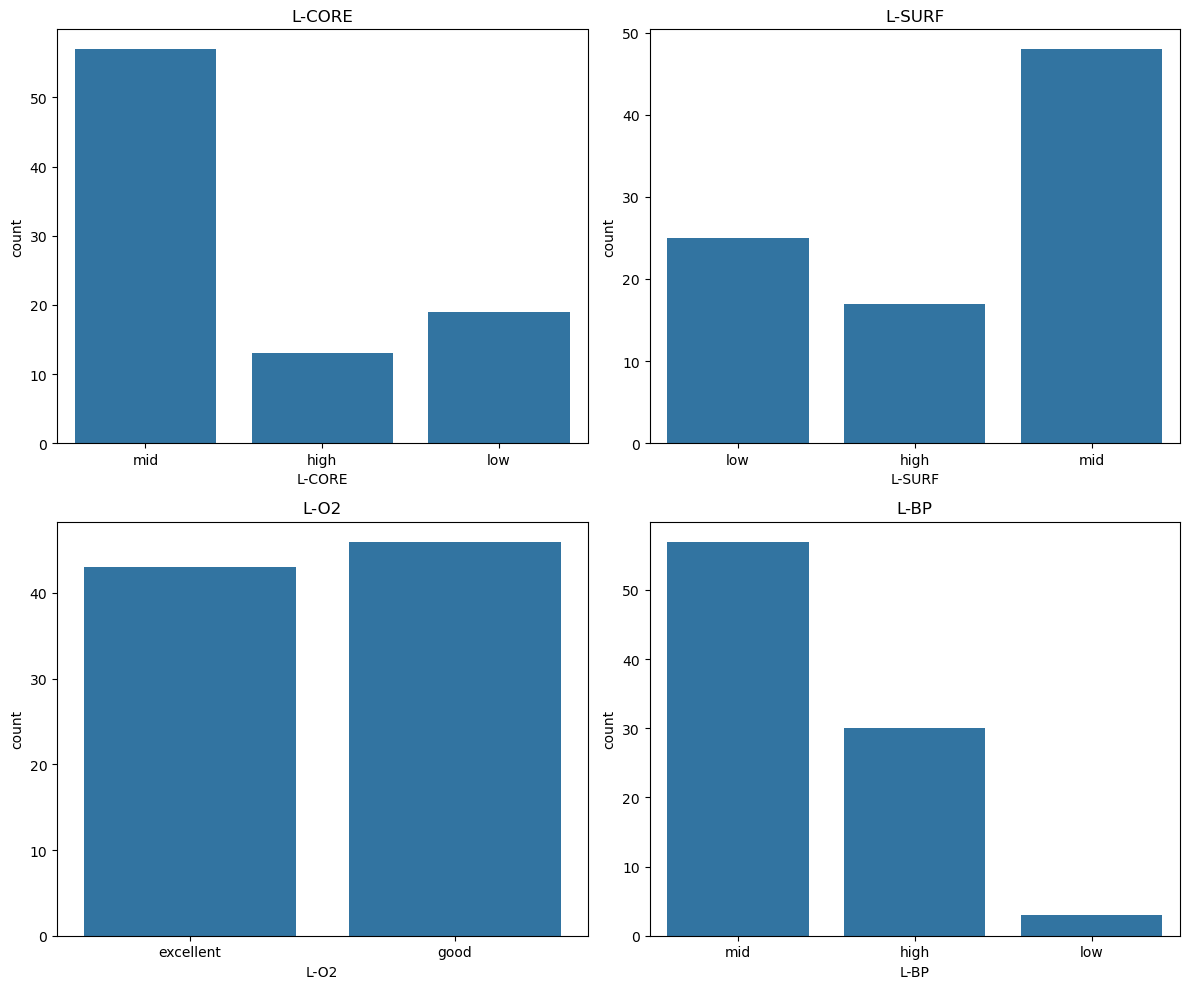

In [17]:
# Plot barchart of L-CORE, L-SURF,L-O2 and L-BP using 4X4 subplots - 3 Marks
#num_bins = 10
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Optional: make plot bigger

# Plot for L-CORE
ax1 = plt.subplot(2, 2, 1)
sns.countplot(x="L-CORE", data=df, ax=ax1)
ax1.set_title("L-CORE")

# Plot for L-SURF
ax2 = plt.subplot(2, 2, 2)
sns.countplot(x="L-SURF", data=df, ax=ax2)
ax2.set_title("L-SURF")

# Plot for L-O2
ax3 = plt.subplot(2, 2, 3)
sns.countplot(x="L-O2", data=df, ax=ax3)
ax3.set_title("L-O2")

# Plot for L-BP
ax4 = plt.subplot(2, 2, 4)
sns.countplot(x="L-BP", data=df, ax=ax4)
ax4.set_title("L-BP")

plt.tight_layout()
plt.show()



In [18]:
s=df.value_counts()
s

L-CORE  L-SURF  L-O2       L-BP  SURF-STBL  CORE-STBL  BP-STBL     COMFORT  ADM-DECS
mid     mid     excellent  mid   unstable   stable     stable      10.0     A           4
                           high  stable     stable     stable      10.0     A           3
                           mid   stable     stable     unstable    10.0     A           2
low     low     excellent  mid   stable     stable     stable      10.0     A           2
mid     mid     good       mid   stable     stable     stable      10.0     A           2
                                                                                       ..
low     mid     good       mid   stable     stable     stable      15.0     S           1
                excellent  mid   stable     stable     stable      10.0     S           1
                           high  unstable   stable     unstable    10.0     S           1
        low     good       mid   unstable   stable     unstable    10.0     S           1
mid     high   

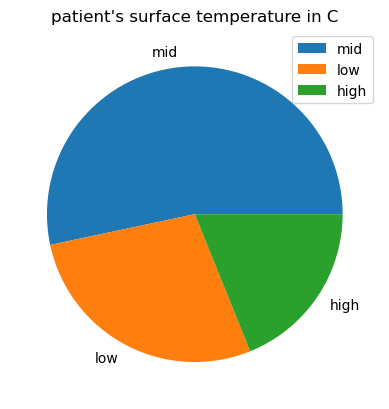

In [19]:
# Plot pie chart of patient's surface temperature in C - 2 Mark
s=df["L-SURF"].value_counts()
#help(plt.pie)
plt.pie(x=s.values,labels=s.index)
# title of the pie chart
plt.title("patient's surface temperature in C")
plt.legend()


In [20]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parame

In [21]:
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10.0,A
86,mid,mid,excellent,mid,unstable,stable,stable,15.0,S
87,mid,mid,NaN,mid,unstable,stable,stable,15.0,A
88,mid,mid,excellent,mid,unstable,stable,stable,10.0,A


In [22]:
#Prepare X - input matrix and y - label vector - 1 Mark
X = df.iloc[:,:-1]
y=df["ADM-DECS"]

In [23]:
X

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT
0,mid,low,excellent,mid,stable,stable,stable,15.0
1,mid,high,excellent,high,stable,stable,stable,10.0
2,high,low,excellent,high,stable,stable,mod-stable,10.0
3,mid,low,good,high,stable,unstable,mod-stable,15.0
4,mid,mid,excellent,high,stable,stable,stable,10.0
...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10.0
86,mid,mid,excellent,mid,unstable,stable,stable,15.0
87,mid,mid,NaN,mid,unstable,stable,stable,15.0
88,mid,mid,excellent,mid,unstable,stable,stable,10.0


In [24]:
y

0     A
1     S
2     A
3     A
4     A
     ..
85    A
86    S
87    A
88    A
89    S
Name: ADM-DECS, Length: 90, dtype: object

In [25]:
#Apply label encoder for categorical columns - 2 Marks
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["L-CORE"] = encoder.fit_transform(df["L-CORE"])
X["L-SURF"] = encoder.fit_transform(df["L-SURF"])
X["L-O2"] = encoder.fit_transform(df["L-O2"])
X["L-BP"] = encoder.fit_transform(df["L-BP"])
X["SURF-STBL"] = encoder.fit_transform(df["SURF-STBL"])
X["CORE-STBL"] = encoder.fit_transform(df["CORE-STBL"])
X["BP-STBL"] = encoder.fit_transform(df["BP-STBL"])
X["COMFORT"] = encoder.fit_transform(df["COMFORT"])

In [26]:
# Split the data into train and test set  - use test size = 30% and random state = 4 : - 2 Marks
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [27]:
#Print train and test data size
X_train.shape

(63, 8)

In [28]:
X_test.shape

(27, 8)

In [29]:
y_train.shape

(63,)

In [30]:
y_test.shape

(27,)

In [31]:
# Fit the Naive Bayes classifier on training data - 3 Marks
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

In [32]:
# Make prediction on test data - 1 Marks
y_pred=model.predict(X_test)


In [33]:
# Check the evaluation metrics of the model - Confusion Matrix, Accuracy, Precision, Recall, F1 score - 3 Marks
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
accuracy_score(y_pred,y_test) # accuracy

0.5925925925925926

In [35]:
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        16
           S       1.00      1.00      1.00        11

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [36]:
confusion_matrix(y_pred,y_test)

array([[16, 11],
       [ 0,  0]])

In [37]:
#Apply prediction on any one sample input and print the probability estimates for each class - 1 marks
sample= X.iloc[13,:]
s=df["ADM-DECS"].value_counts()
pred=model.predict(sample.values.reshape(1,-1))
x=model.predict_proba(sample.values.reshape(1,-1)) # it will probabilities of each class
print(list(s.index))
print(list(x))


['A', 'S', 'I']
[array([0.77479672, 0.0217848 , 0.20341847])]


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [38]:
df["ADM-DECS"].value_counts()

ADM-DECS
A    64
S    24
I     2
Name: count, dtype: int64